# Trabajo práctico integrador.

## Análisis de datos.

### Datos de distintas canciones en Spotify

### Imputación de datos faltes. Si bien el dataset utilizado no contiene valores nulos, se aplica un Scrypt enviado en clase, para poder generarlos con un porcentaje definido y a las variables que deseemos, para luego amplicar algún método de imputación de valores faltantes visto en clase.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression

from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score

np.random.seed(42)

In [3]:
# Set color palette
color = ['#1ED760', '#FAF5F5']
sns.set_palette(sns.color_palette(color))

In [4]:
# Load dataset from GitHub repository
df = pd.read_csv('https://raw.githubusercontent.com/ldidone/analisis_de_datos_CEIA_TP/main/data/data_playlist.csv')

In [5]:
# Show first 10 rows
df.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.524,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.748,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.913,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


In [6]:
# Define numeric vars
numeric = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
useful_statistics = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
five_statistics = ['min', '25%', '50%', '75%', 'max']

In [7]:
# General description of each numeric var
df[numeric].describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,0.594188,0.100245,0.203376,-8.509339,0.098966,0.497321
std,0.338405,0.172036,0.253301,0.259921,0.177609,5.039488,0.104715,0.239615
min,0.000001,0.107000,0.009250,0.000000,0.024000,-29.601000,0.023400,0.033200
25%,0.037150,0.480000,0.423250,0.000000,0.094550,-10.173500,0.035900,0.297000
50%,0.244500,0.606000,0.631500,0.000010,0.129000,-7.270000,0.048750,0.483000
75%,0.678500,0.715750,0.804750,0.002245,0.264750,-5.097750,0.113000,0.684500
max,0.994000,0.986000,0.995000,0.967000,0.979000,-0.533000,0.721000,0.975000


In [8]:
# Describe dataset 5 numeric statistics
df[numeric].describe().loc[five_statistics]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
min,0.000001,0.10700,0.00925,0.000000,0.02400,-29.60100,0.02340,0.0332
25%,0.037150,0.48000,0.42325,0.000000,0.09455,-10.17350,0.03590,0.2970
50%,0.244500,0.60600,0.63150,0.000010,0.12900,-7.27000,0.04875,0.4830
75%,0.678500,0.71575,0.80475,0.002245,0.26475,-5.09775,0.11300,0.6845
max,0.994000,0.98600,0.99500,0.967000,0.97900,-0.53300,0.72100,0.9750


In [9]:
# Identify datatypes
df.dtypes

acousticness        float64
danceability        float64
duration              int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
label                 int64
dtype: object

### Descripción de las variables.
Se identifican los tipos de datos de las variables. Además se clasifican en variables de entrada y de salida.

| Variable         | Tipo de dato        | Descripción                                                                                  | ¿Es informativa para un problema de clasificación? | Entrada o salida |
|------------------|---------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------|------------------|
| acousticness     | Numérico (ordinal). | Indica el grado de acusticidad de una canción.                                               | Sí                                                | Entrada          |
| danceability     | Numérico (ordinal). | Indica que tan bailable es una canción.                                                      | Sí                                                 | Entrada          |
| energy           | Numérico (ordinal). | Indica el nivel de energía de una canción.                                                   | Sí                                                 | Entrada          |
| instrumentalness | Numérico (ordinal). | Indica qué tan instrumental es una canción.                                                  | Sí                                                 | Entrada          |
| key              | Categórico.         | Indica la tonalidad en la que se encuentra la canción.                                       | Sí (One Hot Enconding)                                                 | Entrada          |
| liveness         | Numérico (ordinal). | Indica qué tan "en vivo" es la canción.                                                      | Sí                                                 | Entrada          |
| loudness         | Numérico (ordinal). | Indica el volumen general de una pista en decibelios (dB)                                    | Sí                                                 | Entrada          |
| mode             | Categórico.         | Indica la modalidad (mayor o menor) de una canción. Contenido melódico.                      | Sí (One Hot Enconding).                                                | Entrada          |
| speechiness      | Numérico (ordinal). | Indica la proporción de discurso que hay en la canción.                                      | Sí                                                 | Entrada          |
| tempo            | Categórico. | El tempo general estimado de una pista en pulsaciones por minuto (BPM).                      | Sí (One Hot Enconding)                                                 | Entrada          |
| time_signature   | Categórico.         | El compás es una convención de notación para especificar cuántos tiempos hay en cada compás. | Sí (One Hot Enconding)                                                | Entrada          |
| valence          | Numérico (ordinal)  | Describe la positividad musical que transmite una canción.                                   | Sí                                                 | Entrada          |
| label            | Categórico.         | Indica si la canción es del gusto de la persona que tiene esta playlist activa               | No (ya que es la variable de salida)               | Salida           |

### Valores Faltantes

In [10]:
df.isnull().sum().to_frame()

,0
acousticness,0
danceability,0
duration,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


### No se evidencian la presencia de valores faltantes o nulos.

### Se aplica el Scrypt compartido en clase, para agregar valores nulos al dataset y analizar su nueva composición.

In [11]:
L=enumerate
E=None
C=print
D=len
import pandas as G,numpy as A,requests as H
def generate_nulls(df,cols=E,percentage=0.05):
	C=cols;B=df;C=B.columns.tolist()if C is E else C;G=A.random.randint(100,size=D(C));H=A.math.floor(D(B)*percentage);
	for (I,F) in L(C):A.random.seed(G[I]);J=B[F].sample(n=H).index;B[F].iloc[J]=A.nan if B[F].dtype in[int,float]else E
	return B
def sparsify_data(df,percentage=0.02):
	B=df;F=A.random.randint(100,size=D(B));G=A.math.floor(D(B)*percentage);H=B.sample(n=G).index
	for (I,C) in L(H):A.random.seed(F[I]);B.iloc[C]={D:F if A.random.binomial(1,0.5)else E for(D,F)in B.iloc[C].items()}

In [12]:
cols = [ 'acousticness', 
         'duration',
         'energy',
         'liveness',
         'valence'
]

In [13]:
import pandas as pd

In [14]:
input_df = pd.read_csvinput_df = pd.read_csv('https://raw.githubusercontent.com/ldidone/analisis_de_datos_CEIA_TP/main/data/data_playlist.csv')

In [15]:
input_df.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.524,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.748,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.913,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


### Se asignan varias columnas de las numéricas para generar valores faltantes en ellas

In [16]:
cols = [
        'acousticness',
        'danceability',
        'energy',
        'instrumentalness',
        'loudness',
        'speechiness',
        'valence'
]

In [17]:
output_df = generate_nulls(input_df, cols, 0.20)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
output_df.to_csv('/content/new_data_with_nulls.csv', index = False)

In [19]:
output_df.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,NaN,0.000000,4,0.2630,-6.935,1,NaN,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,NaN,1,0.0429,109.960,4,NaN,1
4,0.883,NaN,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,NaN,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597,0.507,183573,0.795,NaN,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452,NaN,259102,0.435,0.609000,1,0.0953,-9.582,1,NaN,119.038,4,0.243,1
8,0.748,NaN,366179,0.324,0.839000,9,0.0723,-14.700,0,NaN,183.020,3,0.330,1
9,0.913,0.292,197613,NaN,NaN,0,0.2090,-9.758,1,NaN,140.316,4,0.249,1


In [23]:
output_df.isnull().sum().to_frame()

,0
acousticness,150
danceability,150
duration,0
energy,150
instrumentalness,150
key,0
liveness,0
loudness,150
mode,0
speechiness,150


In [27]:
from sklearn.impute import SimpleImputer

X = output_df.values [:, :-1] # Todas las filas, todas las columnas menos la última

# Promedio
imputer = SimpleImputer(strategy='mean',add_indicator=False)
X_imputed_mean = imputer.fit_transform(X)

# Nuevo dataframe con X e indicadores de valores imputados
X_cols = output_df.columns.difference(['label'])
X_cols = list(X_cols)+["%s_imputed" % x for x in X_cols]
X_imputed_mean = pd.DataFrame(X_imputed_mean,columns=X_cols[13:])

assert(not np.any(X_imputed_mean.isnull().sum()>0))

# X_imputed_mean[X_imputed_mean.Age_imputed==True].head()
X_imputed_mean.head()

,acousticness_imputed,danceability_imputed,duration_imputed,energy_imputed,instrumentalness_imputed,key_imputed,liveness_imputed,loudness_imputed,mode_imputed,speechiness_imputed,tempo_imputed,time_signature_imputed,valence_imputed
0,0.713,0.51400,100125.0,0.521000,0.816000,8.0,0.1120,-14.835000,0.0,0.044400,119.879,4.0,0.143000
1,0.192,0.71400,207019.0,0.597115,0.000000,4.0,0.2630,-6.935000,1.0,0.097651,123.969,4.0,0.582000
2,0.333,0.63000,216200.0,0.455000,0.000004,5.0,0.1270,-9.290000,1.0,0.029200,139.931,4.0,0.199000
3,0.601,0.81000,136413.0,0.221000,0.210000,5.0,0.1840,-8.455918,1.0,0.042900,109.960,4.0,0.496766
4,0.883,0.60139,181440.0,0.459000,0.000173,6.0,0.0692,-8.137000,0.0,0.035100,90.807,4.0,0.288000


In [29]:
output_df.drop(columns=["key", "mode", "tempo", "time_signature"]).describe()

,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,valence,label
count,600.000000,600.000000,750.000000,600.000000,600.000000,750.000000,600.000000,600.000000,600.000000,750.000000
mean,0.357114,0.601390,220112.733333,0.597115,0.104043,0.203376,-8.455918,0.097651,0.496766,0.602667
std,0.339969,0.171426,65587.690483,0.257005,0.263983,0.177609,5.048872,0.102553,0.238184,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.024000,-29.601000,0.023400,0.033200,0.000000
25%,0.038125,0.485000,185490.250000,0.422750,0.000000,0.094550,-10.191500,0.035800,0.296250,0.000000
50%,0.242000,0.612500,215108.500000,0.643500,0.000017,0.129000,-7.124000,0.048300,0.488000,1.000000
75%,0.674000,0.727000,244236.750000,0.810750,0.002632,0.264750,-5.021000,0.112250,0.679500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,0.979000,-0.913000,0.570000,0.975000,1.000000


In [30]:
output_df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,600.000000,600.000000,750.000000,600.000000,600.000000,750.000000,750.000000,600.000000,750.000000,600.000000,750.000000,750.000000,600.000000,750.000000
mean,0.357114,0.601390,220112.733333,0.597115,0.104043,4.829333,0.203376,-8.455918,0.741333,0.097651,120.405761,3.902667,0.496766,0.602667
std,0.339969,0.171426,65587.690483,0.257005,0.263983,3.636001,0.177609,5.048872,0.438194,0.102553,28.378116,0.400091,0.238184,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.038125,0.485000,185490.250000,0.422750,0.000000,1.000000,0.094550,-10.191500,0.000000,0.035800,98.998000,4.000000,0.296250,0.000000
50%,0.242000,0.612500,215108.500000,0.643500,0.000017,5.000000,0.129000,-7.124000,1.000000,0.048300,120.104500,4.000000,0.488000,1.000000
75%,0.674000,0.727000,244236.750000,0.810750,0.002632,8.000000,0.264750,-5.021000,1.000000,0.112250,138.074750,4.000000,0.679500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.913000,1.000000,0.570000,204.162000,5.000000,0.975000,1.000000


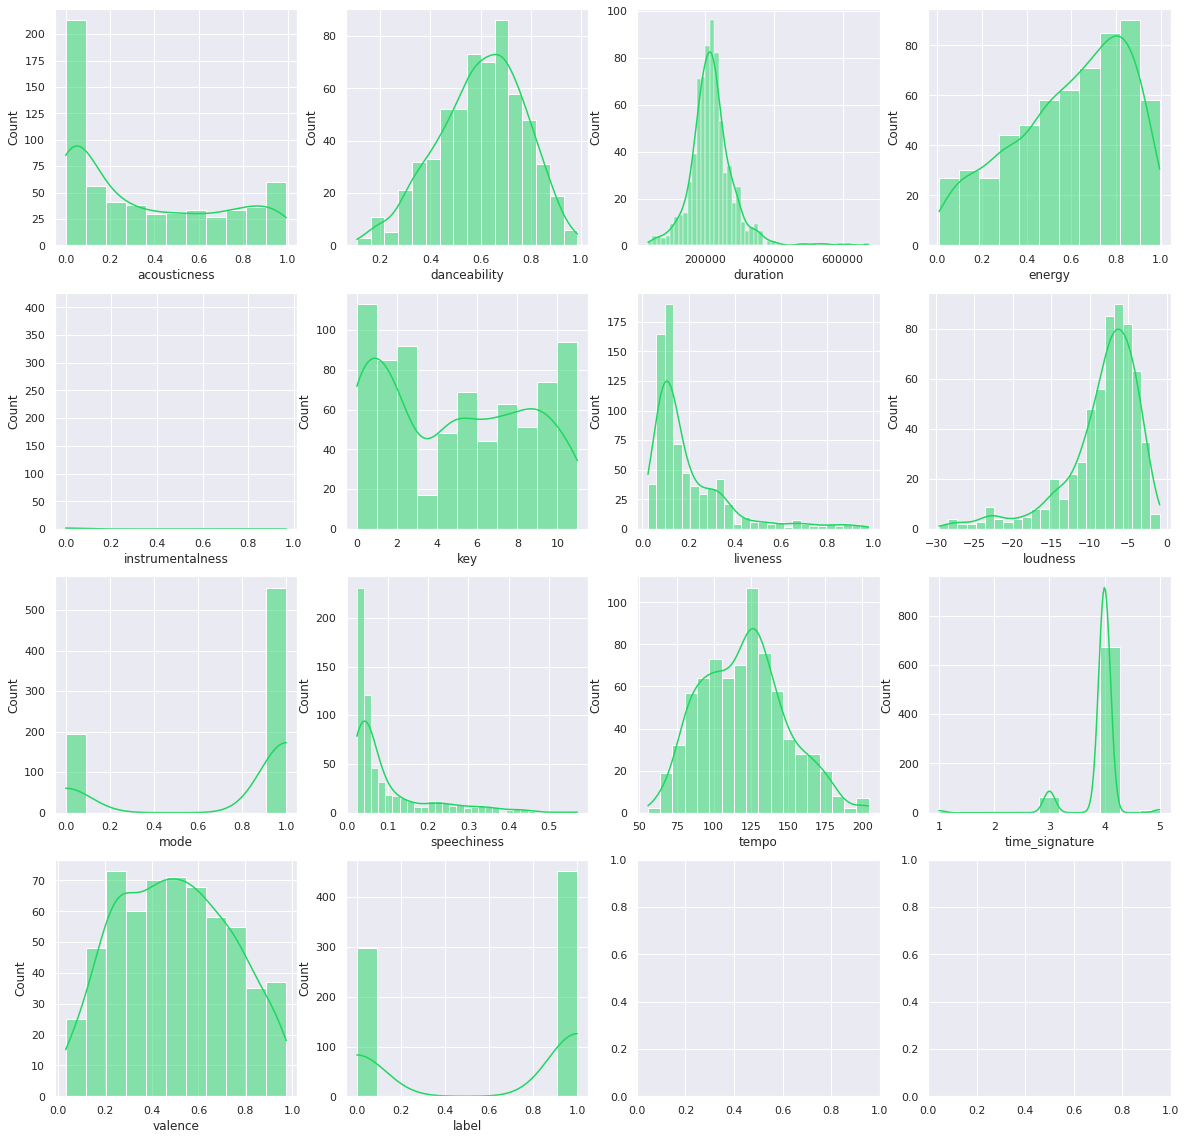

In [33]:
f, axes = plt.subplots(4, 4, figsize=(20, 20))
for ax, feature in zip(axes.flat, output_df.columns):
    sns.histplot(output_df[feature], ax=ax, kde=True)

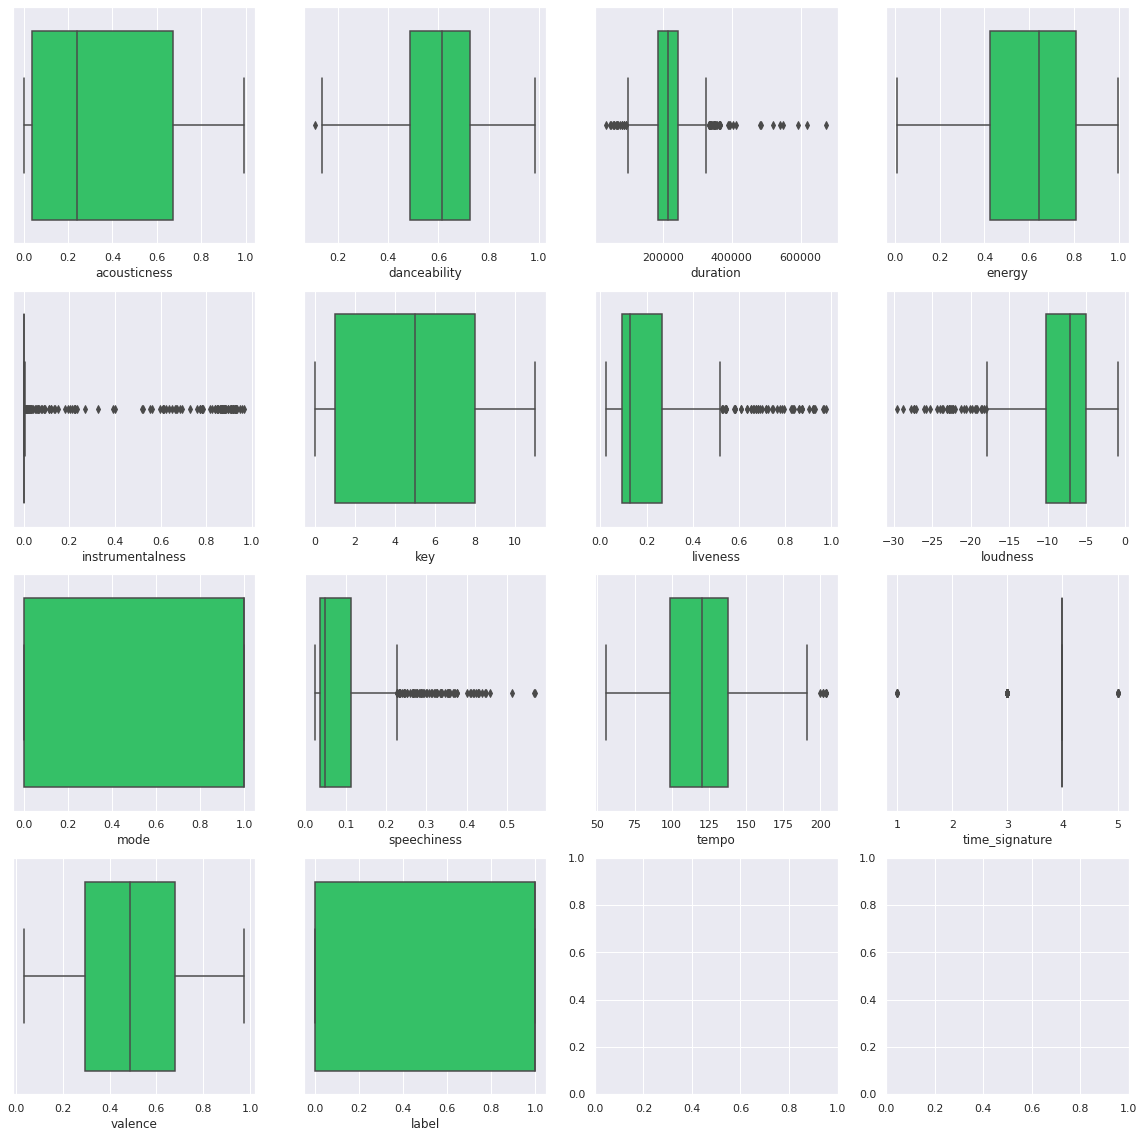

In [34]:
f, axes = plt.subplots(4, 4, figsize=(20, 20))
for ax, feature in zip(axes.flat, output_df.columns):
    sns.boxplot(x=output_df[feature], ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


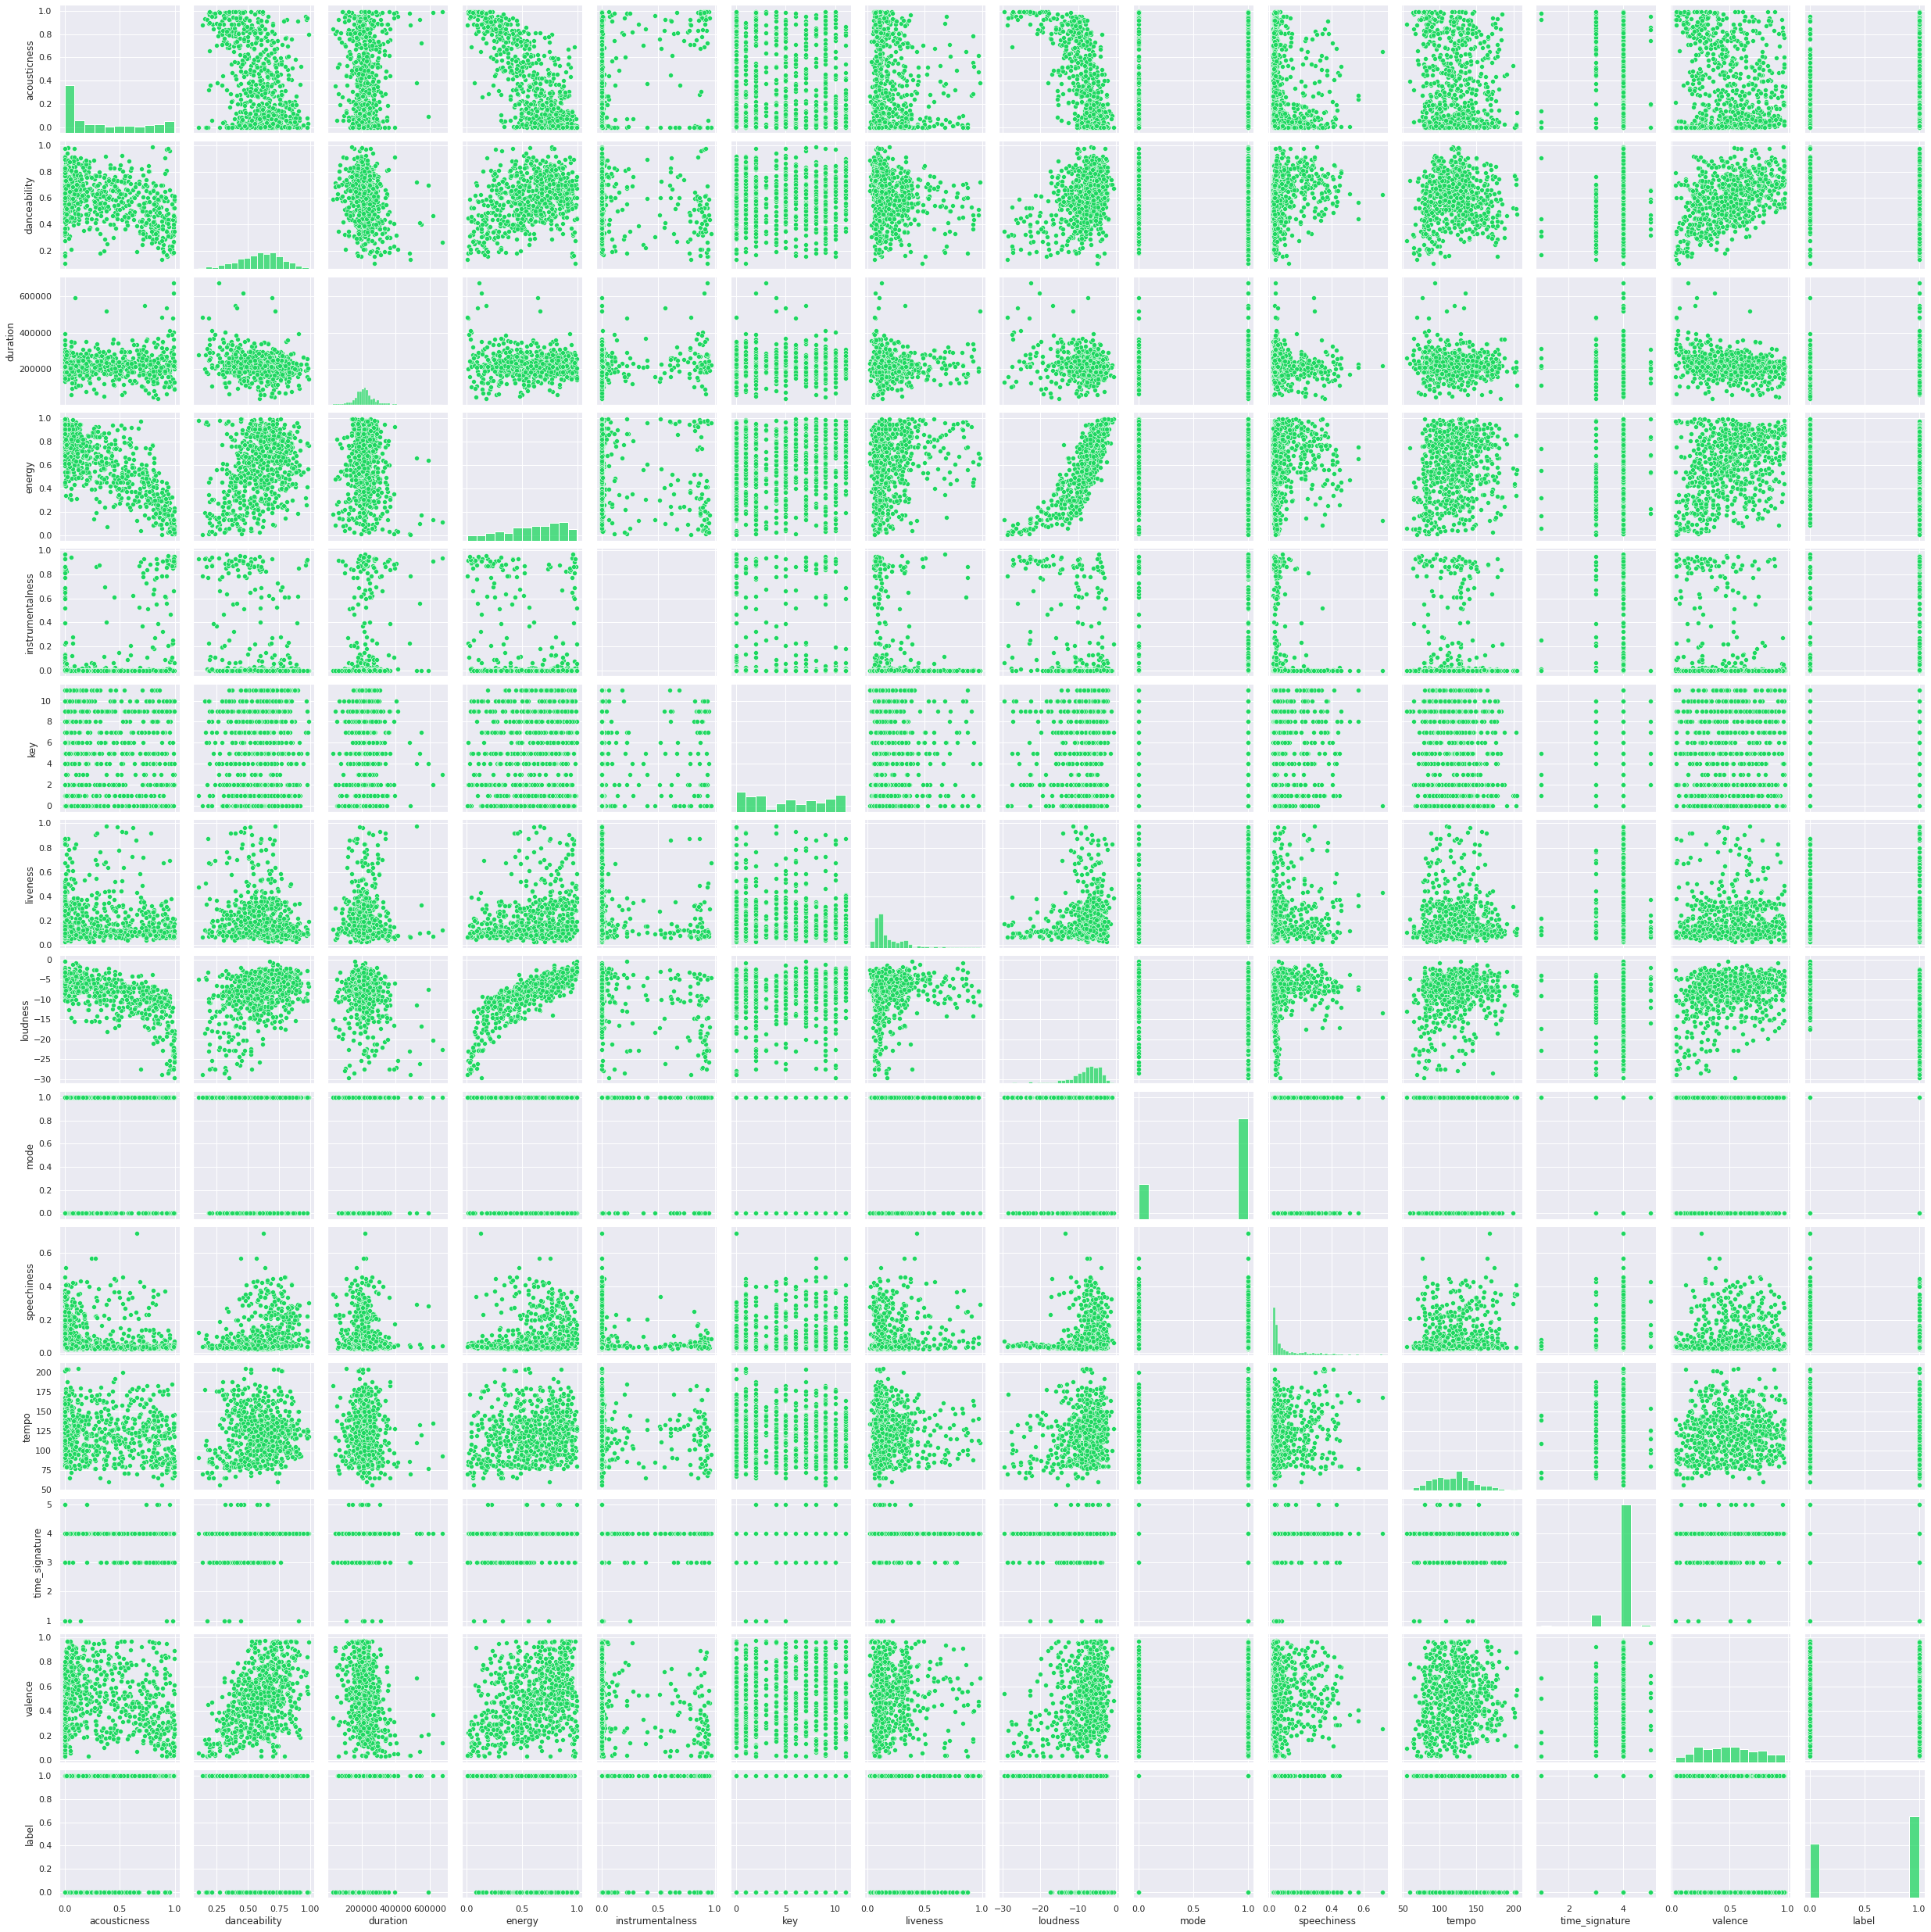

In [35]:
sns.pairplot(df, size=2.5) 

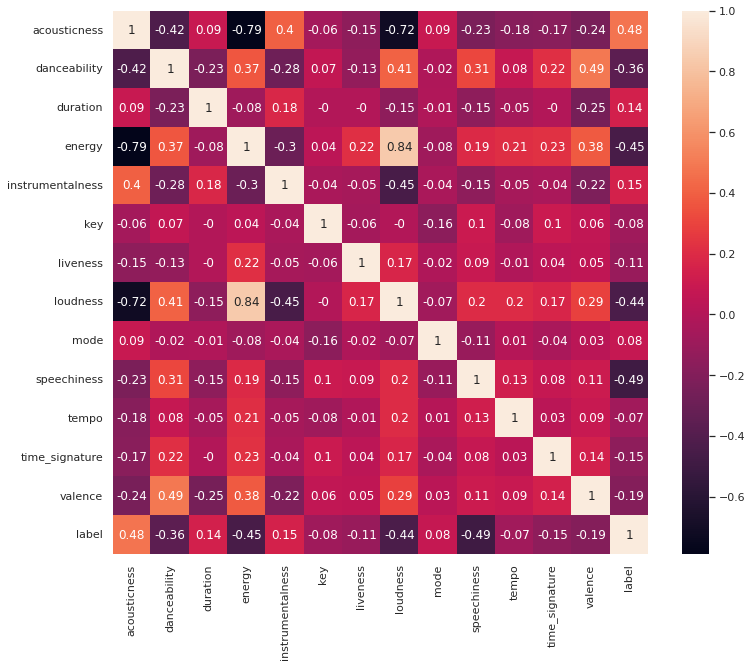

In [36]:
corr_mat_pearson = output_df.corr(method="pearson").round(2)
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(data=corr_mat_pearson, annot=True, ax=axes)

### Conclusiones: Si bien no se experimentan con nuevos modelos en el dataset con un 20% de valores nulos generados con el scrypt, se mantiene la fuerte relación lineal entre la variable de salida "label" y "acousticness", como también una menor relación lineal con "duration" e "instrumentalness".